# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q2, and one of Q1 or Q3.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

For Price variable, removed all commas and then turned strings into ints. No missing values

0.76 of the subject_injury column is missing

force_type
Bodily Force                   7051
Chemical Irritant              1421
Taser                           985
Maximal Restraint Technique     170
Less Lethal                      87
Improvised Weapon                74
Police K9 Bite                   31
Gun Point Display                27
Baton                             2
Name: count, dtype: int64
when subject injury is missing, bodily force is seen the most as the force type. 
WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64 

SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
0    8720
1    4299
2     914
9     274
Name: count, dtype: int64 

count     22986
unique      484
top            
freq       9053
Name: ImposedSentenceAllChargeInContactEvent, dtype: object 

ImposedSentenceAllChargeInContactEvent
                    9053
0   

<Axes: >

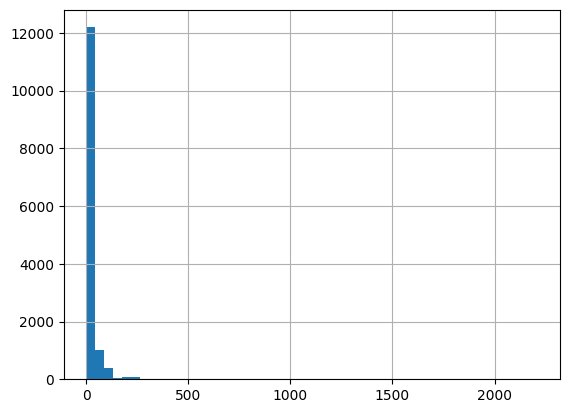

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#1. 
df1 = pd.read_csv('data/airbnb_hw.csv') #read in data table
#clean price var
df1['Price'] = df1['Price'].str.replace(',', '') 
df1['Price'] = df1['Price'].astype(int)
print("For Price variable, removed all commas and then turned strings into ints. No missing values\n")

#2. 
df2 = pd.read_csv('data/mn_police_use_of_force.csv') #read in data table
#clean subject_injury variable
nan_count = df2['subject_injury'].isna().sum()
print(round(nan_count/df2.shape[0], 2), 'of the subject_injury column is missing\n')

nan_df = df2[df2['subject_injury'].isna()] #get data table where subject injury is NaN
nan_arr = nan_df['force_type'].value_counts() #count occurances of each force_type
print(nan_arr)
print('when subject injury is missing, bodily force is seen the most as the force type. ')

#3
df3 = pd.read_parquet('data/justice_data.parquet') #read in data table
print(df3['WhetherDefendantWasReleasedPretrial'].value_counts(), '\n')
df3['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan) #replace all occurences of 9 with np.nan
df3['WhetherDefendantWasReleasedPretrial'] = df3['WhetherDefendantWasReleasedPretrial'].fillna(value = np.nan) #if missing, np.nan

#4
print('Before coercion: \n', df3['ImposedSentenceAllChargeInContactEvent'].describe(),'\n') 
df3['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df3['ImposedSentenceAllChargeInContactEvent'], errors='coerce') # Coerce the variable to numeric
df3['ImposedSentenceAllChargeInContactEvent'] = df3['ImposedSentenceAllChargeInContactEvent'].round() #there were a lot of doubles, so rounded it to int like SentenceTypeAllChargesAtConvictionInContactEvent
df3['ImposedSentenceAllChargeInContactEvent'] = df3['ImposedSentenceAllChargeInContactEvent'].fillna(value = np.nan) #if missing, np.nan
print('After coercion: \n', df3['ImposedSentenceAllChargeInContactEvent'].describe(),'\n') # Describe the numeric variable
df3['ImposedSentenceAllChargeInContactEvent'].hist(bins = 50) # Histogram of the variable values

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

/tmp/ipykernel_1738/519095554.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Date'].dt.year


attacks seem to have a slight upward trend from 1940 to 2020

proportion of victims that are male:  0.84

proportion of victims that were unprovoked:  0.91

out of all unprovoked attacks,  0.84 were male
out of all unprovoked attacks,  0.15 were female
thus, sharks are more likely to launch unprovoked attacks on men

when the attack is provoked, there is a  0.2 chance it is fatal
when the attack is unprovoked, there is a  0.2 chance it is fatal
thus, the chances of it being fatal is the same whether the attack is provoked or unprovoked

when the victim is male, there is a  0.19 chance it is fatal
when the victim is female, there is a  0.15 chance it is fatal
thus, the chances of it being fatal is higher if you are a male

 I still like sharks even after this analysis

proportion of attacks that appear to be from white sharks is  0.04


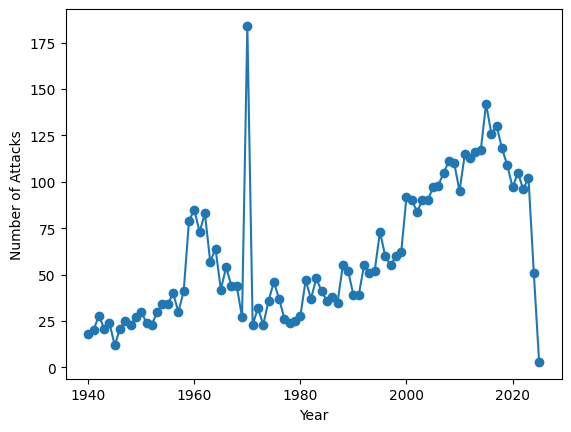

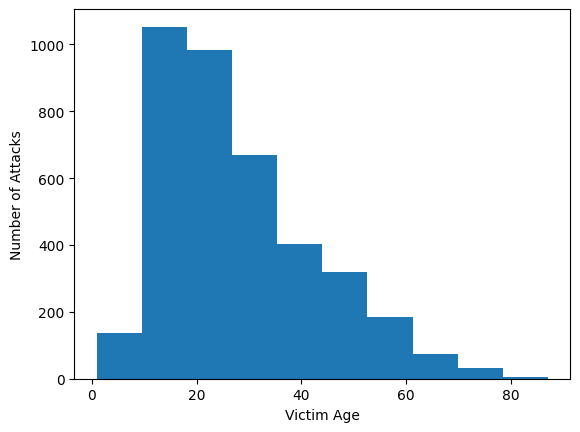

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

#read in data table
df = pd.read_excel(r"GSAF5.xls")
#drop empty columns
for col in df.columns: 
    if df[col].isna().all():
        df.drop(col, inplace=True)  
df.head()
#clean year var, filter and plot
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
filtered_df = df[df['Date'].dt.year >= 1940]
filtered_df['Year'] = filtered_df['Date'].dt.year
attacks_by_year = filtered_df.groupby('Year').size().reset_index(name='Attack_Count')
plt.figure()
plt.plot(attacks_by_year['Year'], attacks_by_year['Attack_Count'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
print("attacks seem to have a slight upward trend from 1940 to 2020")
df.head()
#clean age and make histogram
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age'])
plt.figure()
plt.hist(df['Age'])
plt.xlabel('Victim Age')
plt.ylabel('Number of Attacks')
#proportion of victims that are male
male_count = df[df['Sex'] == 'M'].shape[0]
male_prop = round(male_count/df.shape[0], 2)
print("\nproportion of victims that are male: ", male_prop)
#clean type var
type_arr = ['Provoked', 'Unprovoked', 'Unknown']
df = df[df['Type'].isin(type_arr)]
unprovoked_count = df[df['Type'] == 'Unprovoked'].shape[0]
unprovoked_prop = round(unprovoked_count/df.shape[0], 2)
print("\nproportion of victims that were unprovoked: ", unprovoked_prop)
# clean fatal var
fatal_arr = ['Y', 'N', 'Unknown']
df = df[df['Fatal Y/N'].isin(fatal_arr)]
#unprovoked, men/women
unprovoked_df = df[df['Type'] == 'Unprovoked']
unprovoked_male = round(unprovoked_df[unprovoked_df['Sex'] == 'M'].shape[0]/unprovoked_df.shape[0], 2)
unprovoked_female = round(unprovoked_df[unprovoked_df['Sex'] == 'F'].shape[0]/unprovoked_df.shape[0], 2)
print('\nout of all unprovoked attacks, ', unprovoked_male, 'were male')
print('out of all unprovoked attacks, ', unprovoked_female, 'were female')
print('thus, sharks are more likely to launch unprovoked attacks on men')
#fatal, provoked/unprovoked
provoked_df = df[df['Type'] == 'Unprovoked']
provoked_fatal = round(provoked_df[provoked_df['Fatal Y/N'] == 'Y'].shape[0]/provoked_df.shape[0], 2)
unprovoked_fatal = round(unprovoked_df[unprovoked_df['Fatal Y/N'] == 'Y'].shape[0]/unprovoked_df.shape[0], 2)
print('\nwhen the attack is provoked, there is a ', provoked_fatal, 'chance it is fatal')
print('when the attack is unprovoked, there is a ', unprovoked_fatal, 'chance it is fatal')
print('thus, the chances of it being fatal is the same whether the attack is provoked or unprovoked')
#fatal, male/female
male_df = df[df['Sex'] == 'M']
female_df = df[df['Sex'] == 'F']
male_fatal = round(male_df[male_df['Fatal Y/N'] == 'Y'].shape[0]/male_df.shape[0], 2)
female_fatal = round(female_df[female_df['Fatal Y/N'] == 'Y'].shape[0]/female_df.shape[0], 2)
print('\nwhen the victim is male, there is a ', male_fatal, 'chance it is fatal')
print('when the victim is female, there is a ', female_fatal, 'chance it is fatal')
print('thus, the chances of it being fatal is higher if you are a male')
#how do you feel about sharks
print('\n I still like sharks even after this analysis')
#proportion of attacks from white sharks 
white_count = 0
for row in df['Species ']:
    if 'white' in str(row).split():
        white_count += 1
print('\nproportion of attacks that appear to be from white sharks is ', round(white_count/df.shape[0], 2))


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?